In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import trvae
from matplotlib import pyplot as plt
import os
import tensorflow as tf

/home/97212545/anaconda3/envs/scanpygpu/lib/python3.6/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/97212545/anaconda3/envs/scanpygpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/97212545/anaconda3/envs/scanpygpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/97212545/anaconda3/envs/scanpygpu/lib/python3.6/site-package

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%config InlineBackend.figure_format='retina'

In [4]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Load the Dataset

In [5]:
SCRNA_DIR = '../data/scRNA/'

In [6]:
%time scrna = sc.read_h5ad(SCRNA_DIR + 'expressions.h5ad')
scrna

CPU times: user 408 ms, sys: 5.33 s, total: 5.74 s
Wall time: 5.85 s


AnnData object with n_obs × n_vars = 53638 × 3000 
    obs: 'Group', 'nUMI_pre', 'nUMI', 'nGene', 'cell_type', 'Barcode', 'condition'
    var: 'gene_name', 'gene_id', 'exonLength', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Group_colors', 'cell_type_colors', 'condition_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'

In [9]:
network = trvae.models.CVAE(scrna.shape[1], z_dimension=20, learning_rate=0.0001,
                            alpha=0.01, model_path='./models/scrna/cvae/')

/home/97212545/anaconda3/envs/scanpygpu/lib/python3.6/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [10]:
history = network.train(scrna, n_epochs=100, batch_size=256)

iteration 0: 254.0
iteration 1: 191.0
iteration 2: 180.0
iteration 3: 174.0
iteration 4: 170.0
iteration 5: 167.0
iteration 6: 165.0
iteration 7: 162.0
iteration 8: 160.0
iteration 9: 158.0
iteration 10: 156.0
iteration 11: 155.0
iteration 12: 153.0
iteration 13: 152.0
iteration 14: 151.0
iteration 15: 149.0
iteration 16: 148.0
iteration 17: 147.0
iteration 18: 146.0
iteration 19: 145.0
iteration 20: 144.0
iteration 21: 144.0
iteration 22: 143.0
iteration 23: 142.0
iteration 24: 141.0
iteration 25: 141.0
iteration 26: 140.0
iteration 27: 139.0
iteration 28: 139.0
iteration 29: 138.0
iteration 30: 138.0
iteration 31: 137.0
iteration 32: 137.0
iteration 33: 136.0
iteration 34: 136.0
iteration 35: 135.0
iteration 36: 135.0
iteration 37: 135.0
iteration 38: 134.0
iteration 39: 134.0
iteration 40: 134.0
iteration 41: 133.0
iteration 42: 133.0
iteration 43: 133.0
iteration 44: 133.0
iteration 45: 132.0
iteration 46: 132.0
iteration 47: 132.0
iteration 48: 132.0
iteration 49: 131.0
iteration 

# Analysis

In [11]:
adata = scrna

### UMAP of the latent space

In [16]:
adata_labels, label_encoder = trvae.tl.label_encoder(adata)

In [18]:
adata_latent = network.to_latent(adata.X, adata_labels)
adata_latent = sc.AnnData(adata_latent)
adata_latent.obs = adata.obs

/home/97212545/anaconda3/envs/scanpygpu/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/scanpygpu/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/97212545/anaconda3/envs/scanpygpu/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anac

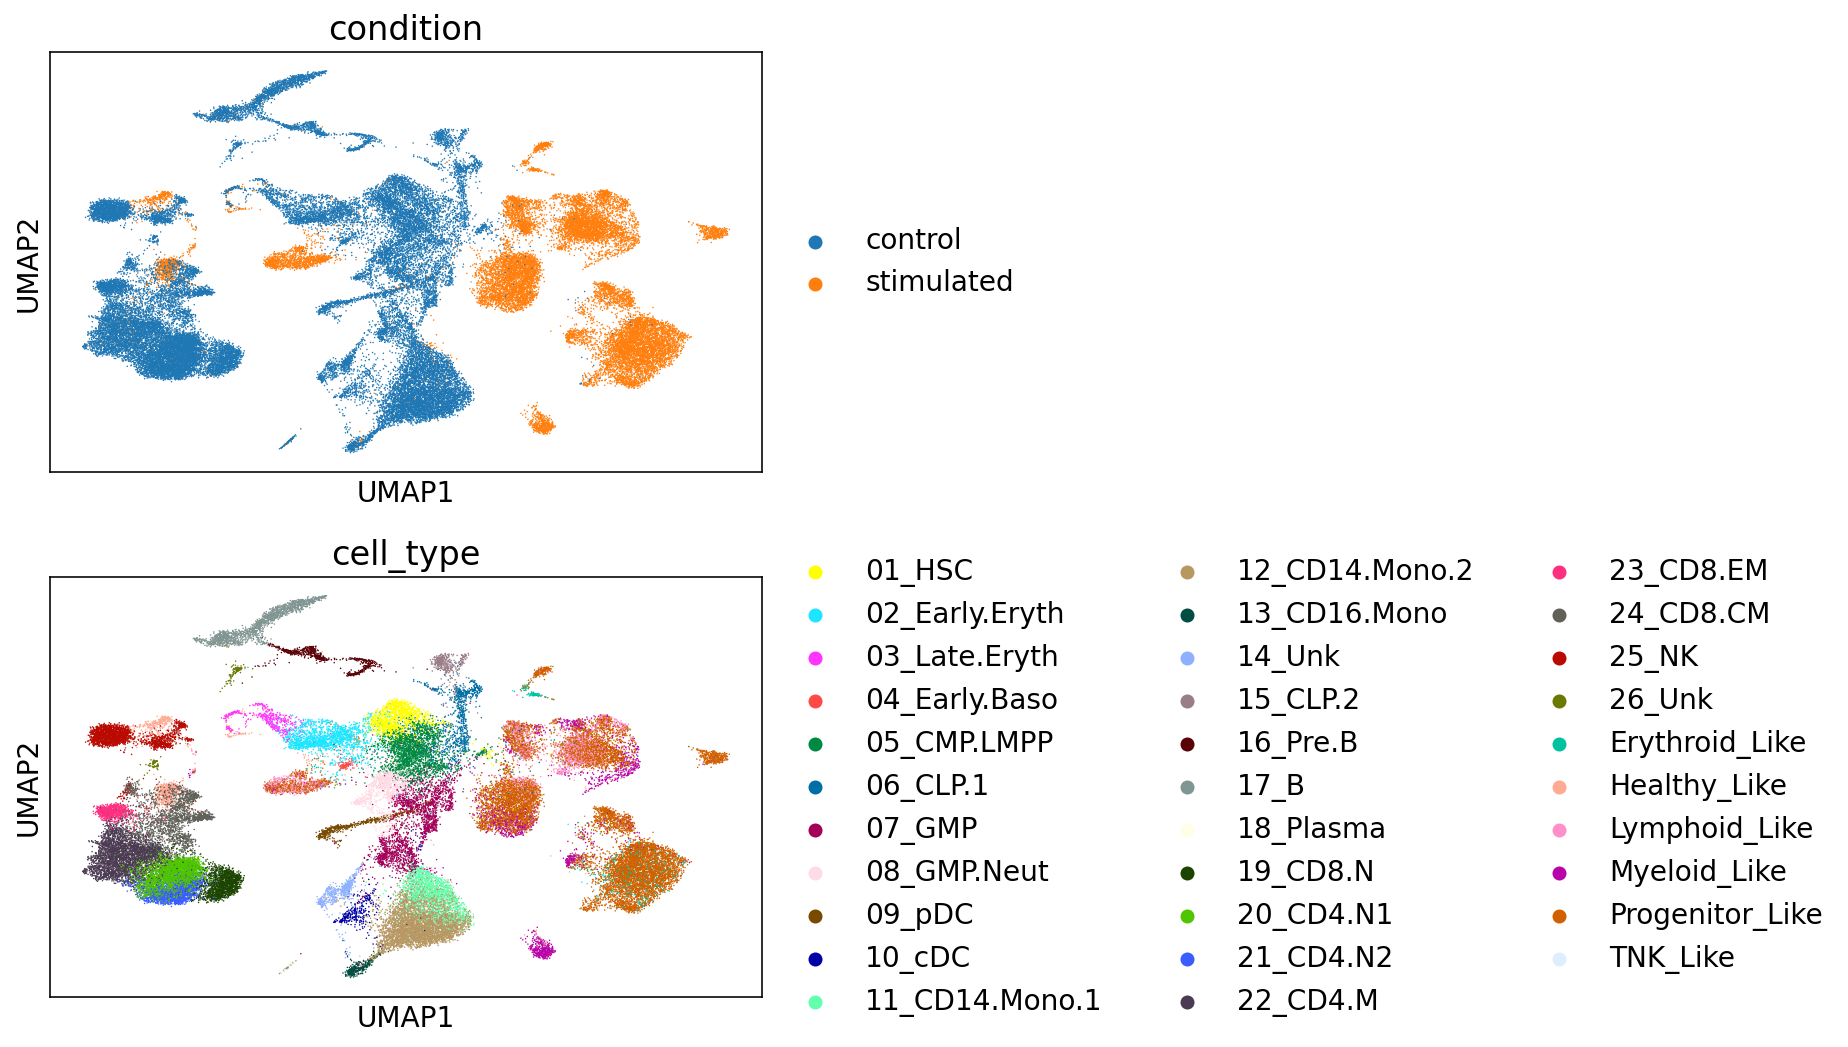

In [19]:
sc.pp.neighbors(adata_latent, random_state=42)
sc.tl.umap(adata_latent, random_state=42)
sc.pl.umap(adata_latent, color=['condition', 'cell_type'], ncols=1)